In [1]:
#!pip install keras
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from skimage.io import imread
from skimage.transform import resize


2025-06-14 08:20:27.981549: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-14 08:20:28.214882: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-14 08:20:28.367055: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749889228.659602    7772 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749889228.762809    7772 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1749889229.408295    7772 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [14]:
import tensorflow as tf
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available: 0


In [3]:
# Montar Google Drive para acceder al dataset
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
train_file = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Train.csv')
train_file.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [15]:
# Parámetros
IMG_HEIGHT = 32
IMG_WIDTH = 32
#DATA_DIR = '/content/drive/MyDrive/Colab Notebooks/Train'
Data_DIR='TrafficSignals/Train'

# Carga de imágenes
images = []
labels = []

for class_id in sorted(os.listdir(DATA_DIR)):
    class_path = os.path.join(DATA_DIR, class_id)
    if not os.path.isdir(class_path): continue
    print(class_path)
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        try:
            img = imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img_resized = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))
            images.append(img_resized)
            labels.append(int(class_id))
        except:
            continue

X = np.array(images, dtype=np.float32)
y = np.array(labels)

NameError: name 'DATA_DIR' is not defined

In [7]:
np.save('/content/drive/MyDrive/Colab Notebooks/'+'X.npy', X)
np.save('/content/drive/MyDrive/Colab Notebooks/'+'y.npy', y)

In [5]:
X = np.load("/content/drive/MyDrive/Colab Notebooks/X.npy")
y = np.load("/content/drive/MyDrive/Colab Notebooks/y.npy")

In [6]:
X /= 255.0  # Escalado a [0, 1]

lb = LabelBinarizer()
y = lb.fit_transform(y)

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [22]:
IMG_HEIGHT = 32
IMG_WIDTH = 32
model = Sequential([
    Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(128, activation='relu'),
    Dense(43, activation='softmax')
])

In [23]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=64
)

Epoch 1/50
491/491 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.3567 - loss: 2.4237 - val_accuracy: 0.5509 - val_loss: 1.4695
Epoch 2/50
491/491 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6893 - loss: 1.0188 - val_accuracy: 0.7044 - val_loss: 0.9695
Epoch 3/50
491/491 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7524 - loss: 0.8106 - val_accuracy: 0.6748 - val_loss: 0.9923
Epoch 4/50
491/491 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8056 - loss: 0.6328 - val_accuracy: 0.8484 - val_loss: 0.4767
Epoch 5/50
491/491 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8249 - loss: 0.5499 - val_accuracy: 0.8572 - val_loss: 0.4619
Epoch 6/50
491/491 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8450 - loss: 0.4924 - val_accuracy: 0.8655 - val_loss: 0.4250
Epoch 7/50
491/491 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8513 - loss: 0.4714 - val_accuracy: 0.8973 - val_loss: 0.3351
Epoch 8/50
491/491 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8675 - loss: 0.4241 - val_accuracy: 0

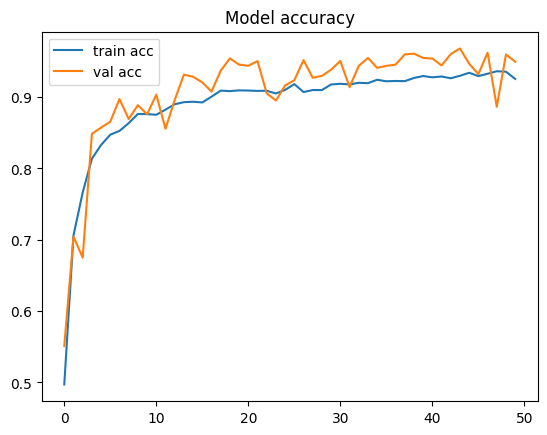

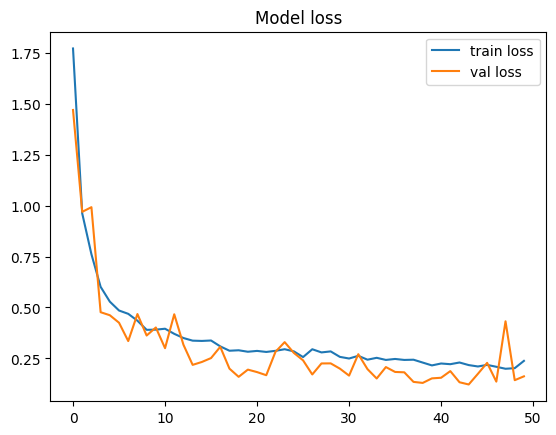

In [24]:
# Curva de accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Model accuracy')
plt.show()

# Curva de pérdida
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title('Model loss')
plt.show()

In [26]:
# Evaluación final sobre el conjunto de prueba
test_loss, test_accuracy = model.evaluate(X_val, y_val, verbose=2)

print(f"\n Test Accuracy: {test_accuracy*100:.2f}%")
print(f" Test Loss: {test_loss:.4f}")

246/246 - 1s - 4ms/step - accuracy: 0.9496 - loss: 0.1619

 Test Accuracy: 94.96%
 Test Loss: 0.1619
